In [1]:
import numpy as np
import pandas as pd

In [2]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

C:\Users\ibuce\AppData\Local\Temp\ipykernel_26968\1263004486.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [52]:
# read nuts shapefile to get geometry
nuts = gpd.read_file("NUTS_RG_20M_2021_3035.shp")
nuts_id = nuts[["NUTS_ID", "CNTR_CODE","geometry"]]
nuts.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,0,FR,France,France,0.0,0,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961..."
1,HR,0,HR,Hrvatska,Hrvatska,0.0,0,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483..."
2,HU,0,HU,Magyarország,Magyarország,0.0,0,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220..."
3,AL,0,AL,Shqipëria,Shqipëria,0.0,0,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473..."
4,AT,0,AT,Österreich,Österreich,0.0,0,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798..."


#### Read Dataset on GDP per cap

In [11]:
# read data on GDP per capita in Europe
gdp_data = pd.read_csv("GDP_reg.csv")
gdp_data.head()

,GEO (Codes),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,BE10,"56,600","55,800","56,700","56,700","57,800","59,500","59,400","60,600","61,600","63,400","60,900","66,200"
1,BE21,"35,100","35,700","36,700","37,000","37,600","39,100","39,900","40,900","41,900","43,400","43,000","46,900"
2,BE22,"24,100","24,900","25,400","25,600","26,600","26,900","27,400","28,300","29,100","29,700","29,200","32,300"
3,BE23,"27,100","27,600","28,300","28,800","29,100","30,400","31,000","32,000","32,600","33,500","33,000","36,300"
4,BE24,"31,800","32,200","33,500","33,800","34,500","35,800","36,700","37,600","38,700","39,900","36,500","39,800"


#### Handling missing values and cleaning dataset

In [12]:
# replace commas with empty strings 
gdp_data = gdp_data.replace(",", "", regex=True)

# handle missing values
gdp_data = gdp_data.replace(":", np.nan)
gdp_data = gdp_data.replace(np.nan, 0)

# convert to float
gdp_data.iloc[:, 1:] = gdp_data.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors="coerce"))
gdp_data.head()

C:\Users\ibuce\AppData\Local\Temp\ipykernel_26968\1994293524.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gdp_data.iloc[:, 1:] = gdp_data.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors="coerce"))


,GEO (Codes),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,BE10,56600,55800,56700,56700,57800,59500,59400,60600,61600,63400,60900,66200
1,BE21,35100,35700,36700,37000,37600,39100,39900,40900,41900,43400,43000,46900
2,BE22,24100,24900,25400,25600,26600,26900,27400,28300,29100,29700,29200,32300
3,BE23,27100,27600,28300,28800,29100,30400,31000,32000,32600,33500,33000,36300
4,BE24,31800,32200,33500,33800,34500,35800,36700,37600,38700,39900,36500,39800


In [69]:
# merge datasets - we need geometry in our GDP data
gdp_merged = pd.merge(gdp_data, nuts_id, 
                        left_on="GEO (Codes)", right_on="NUTS_ID", how="left")
print(len(gdp_merged))

gdp_merged = gdp_merged[gdp_merged["GEO (Codes)"] != "FRY1"]
gdp_merged = gdp_merged[gdp_merged["GEO (Codes)"] != "FRY2"]
gdp_merged = gdp_merged[gdp_merged["GEO (Codes)"] != "FRY3"]
gdp_merged = gdp_merged[gdp_merged["GEO (Codes)"] != "FRY4"]
gdp_merged = gdp_merged[gdp_merged["GEO (Codes)"] != "FRY5"]
gdp_merged.head()

290


,GEO (Codes),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,NUTS_ID,CNTR_CODE,geometry
0,BE10,56600,55800,56700,56700,57800,59500,59400,60600,61600,63400,60900,66200,BE10,BE,"POLYGON ((3918539.900 3093738.316, 3919617.440..."
1,BE21,35100,35700,36700,37000,37600,39100,39900,40900,41900,43400,43000,46900,BE21,BE,"POLYGON ((3957506.818 3167694.476, 3964175.126..."
2,BE22,24100,24900,25400,25600,26600,26900,27400,28300,29100,29700,29200,32300,BE22,BE,"MULTIPOLYGON (((4031283.681 3079646.392, 40258..."
3,BE23,27100,27600,28300,28800,29100,30400,31000,32000,32600,33500,33000,36300,BE23,BE,"POLYGON ((3920366.333 3153922.691, 3922957.192..."
4,BE24,31800,32200,33500,33800,34500,35800,36700,37600,38700,39900,36500,39800,BE24,BE,"POLYGON ((3975414.334 3077940.645, 3969815.463..."


In [70]:
# convert into geopandas dataframe
gdp_gdf = gpd.GeoDataFrame(gdp_merged, geometry="geometry")

# drop redundant column
gdp_gdf = gdp_gdf.drop("NUTS_ID", axis=1)

#### Inequality Vizualizations

<AxesSubplot: xlabel='2021', ylabel='Count'>

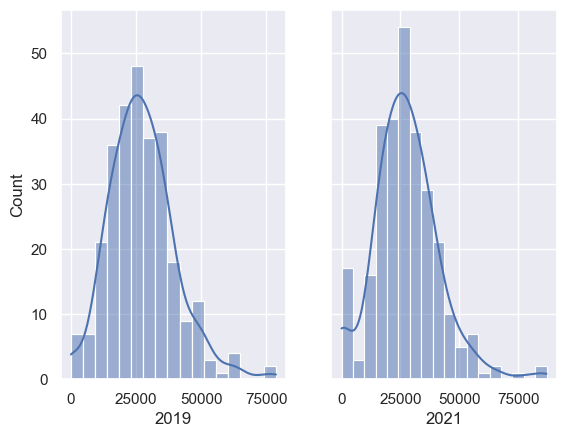

In [71]:
# histogram of income distribution
sns.set_theme()
f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(x=gdp_gdf["2019"], kde=True, ax=axs[0])
sns.histplot(x=gdp_gdf["2021"], kde=True, ax=axs[1])

<AxesSubplot: xlabel='2019', ylabel='Density'>

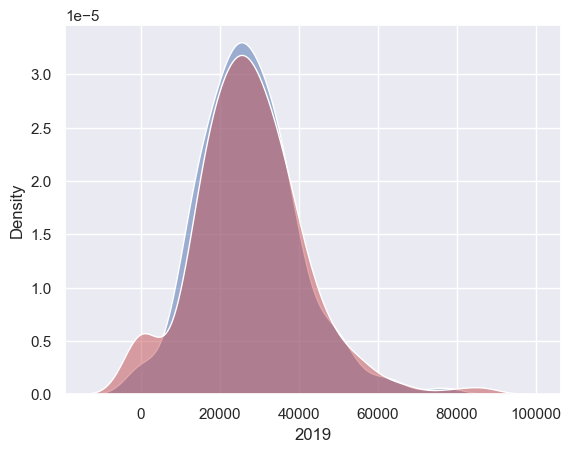

In [72]:
# kernel density plot
sns.kdeplot(x=gdp_gdf["2019"], multiple="stack", alpha=.5)
sns.kdeplot(x=gdp_gdf["2021"], multiple="stack", alpha=.5, color="r")

<AxesSubplot: xlabel='2019', ylabel='Density'>

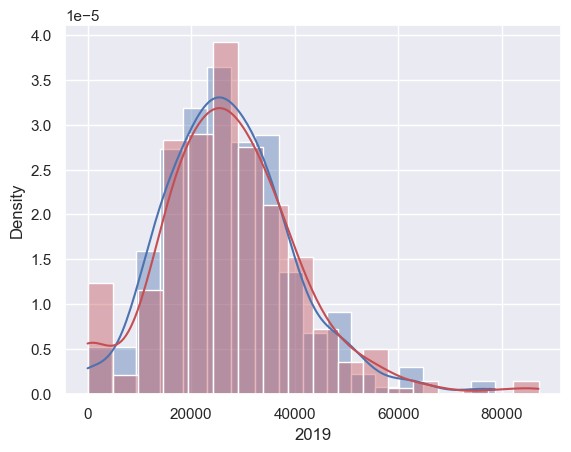

In [73]:
# normalized
sns.histplot(x=gdp_gdf["2019"], kde=True, alpha=.4, stat="density", common_norm=False)
sns.histplot(x=gdp_gdf["2021"], kde=True, alpha=.4, color="r", stat="density", common_norm=False)

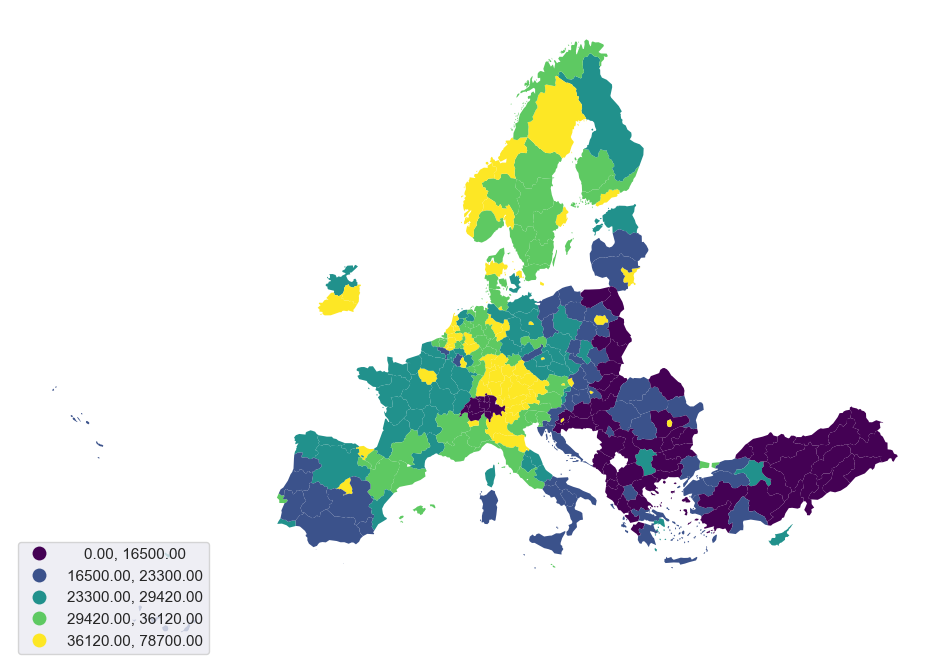

In [74]:
# create a map
ax = gdp_gdf.plot(
    column="2019",
    scheme="Quantiles",
    legend=True,
    edgecolor="none",
    legend_kwds={"loc": "lower left"},
    figsize=(12, 12),
)
ax.set_axis_off()
plt.show()

In [81]:
# top 20 richest regions in 2019
top20_19 = gdp_gdf.nlargest(20, "2019")
top20_19 = top20_19[["GEO (Codes)", "CNTR_CODE", "2019", "geometry"]]


# top 20 richest regions in 2021
top20_21 = gdp_gdf.nlargest(20, "2021")
top20_21 = top20_21[["GEO (Codes)", "CNTR_CODE", "2021", "geometry"]]

### Measures of Inequality

#### 20:20 Ratio
Ratio of the 80th percentile to 20th percentile of income distribution.

In [83]:
# measures of inequality: 20:20 ratio

# obtain 20th and 80th percentile of income distribution of EU regions
top20_19, bottom20_19 = gdp_gdf["2019"].quantile([0.8, 0.2])
top20_21, bottom20_21 = gdp_gdf["2021"].quantile([0.8, 0.2])

# ratio of top20 to bottom20
ratio_19 = top20_19/bottom20_19
ratio_21 = top20_21/bottom20_21

print(ratio_19)
print(ratio_21)

2.189090909090909
2.154651162790698


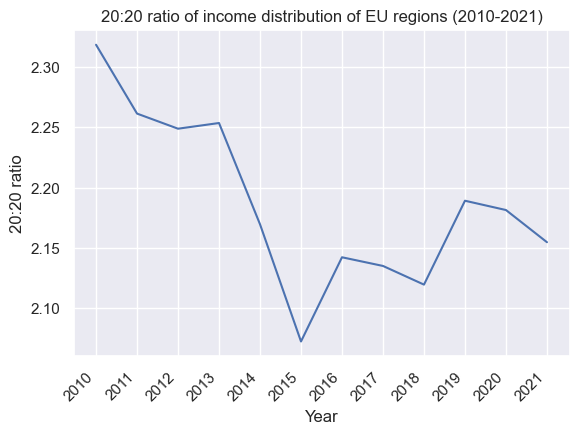

In [89]:
# define a function which calculates this ratio
def ratio20(values):
    top20, bottom20 = values.quantile([0.8, 0.2])
    return top20/bottom20

# generate a range of strings from 2010 to 2021
years = np.arange(2010, 2022).astype(str)
# Compute 20:20 ratio for every year
ratio_2020 = gdp_gdf[years].apply(ratio20, axis=0)
# Plot evolution of 20:20 ratio
ax = plt.plot(years, ratio_2020)

# Grab figure generated in the plot
figure = plt.gcf()
# Add title
plt.title("20:20 ratio of income distribution of EU regions (2010-2021)")
# Replace tick labels with every other year
plt.xticks(years)
# Set vertical label
plt.ylabel("20:20 ratio")
# Set horizontal label
plt.xlabel("Year")
# Rotate year labels
figure.autofmt_xdate(rotation=45)

plt.show()